# To be completed at the Live Session and in your own time.

These set of examples we will help you get familiar with non parametric tests and correlations within a Jupyter notebook.   The questions coloured green are important practice for CA, particularly CA 2.

Before attempting these examples, please ensure you have read through [Chapter 7 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2024/blob/master/blended_exercises/Chapter7/Chapter7.ipynb) and have completed the Learning Central **Chapter 7 quiz**. 

***

# MCMC

## <font color=#30a64d>Question</font>

In Chapter 6, we saw that Professor Dumbledore, studying the extinction of dragons, discovers a new set of egg remnants in an unexplored valley in Madagascar. The remnants are radio carbon dated and found to have the following ages in years:

2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59

Professor Snape however did a previous study in the next valley where he found eggs that were on average 1200 years old, following a normal distribution with standard deviation of 300 years. 

- Write an MCMC algorithm from scratch and use it to create a posterior distribution for the mean age of the eggs. What is the mean and variance for the posterior using your MCMC distribution?

- Check the MCMC has converged.

- How does this compare with the analytical values you derived in Chapter 6?

### Answer

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Dumbledore_set = [2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59]

mean_Dumbledore = np.mean(Dumbledore_set)
std_Dumbledore = np.std(Dumbledore_set)

mean_Snape = 1200 # posterior mean
std_Snape = 300   # posterior std

def posterior(theta):
    # liklihood
    data = [2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59] # Dumbledore set
    mean = np.mean(data)
    n = len(data)
    std = np.std(data)
    var = std**2.0 / n
    # prior
    mean_0 = 1200.
    std_0 = 300.
    
    val = np.exp(-0.5 * (theta**2.0*((1/(var))+(1/std_0**2.0)) - (2*theta*((mean/var)+(mean_0/std_0**2.)))))
    return val


In [32]:
N_mcmc = int(1e6)
theta_current = np.zeros(N_mcmc + 1)
# use prior as guess
theta_current[0] = 800

# width of normal dists to get step size
sigma_mcmc = 50.

for i in range(N_mcmc):
    if i % 100_000 == 0:
        print(i)
    p_curr = posterior(theta_current[i])
    dtheta = np.random.normal(0, sigma_mcmc)
    theta_proposed = theta_current[i] + dtheta
    p_proposed = posterior(theta_proposed)
    
    if p_proposed > p_curr:
        theta_current[i+1] = theta_proposed
    else:
        # if new prob is lower than prob current
        # use ratios of probabilties
        p_new_move = p_proposed/p_curr
        # generate uniform random number
        u_rand = np.random.uniform(low=0, high=1)
        if u_rand < p_new_move:
            theta_current[i+1] = theta_proposed
        else:
            theta_current[i+1] = theta_current[i]
            
mean_mcmc = np.mean(theta_current)
std_mcmc = np.std(theta_current)

print("Mean age from MCMC is {:.2f} +/- {:.2f} years".format(mean_mcmc, std_mcmc))

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
Mean age from MCMC is 1570.11 +/- 136.15 years


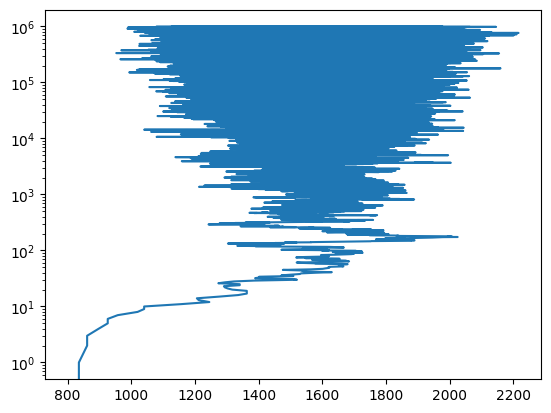

In [33]:
x_mcmc = np.linspace(0,N_mcmc,N_mcmc+1)
plt.plot(theta_current, x_mcmc)
plt.yscale('log')

(400.0, 2400.0)

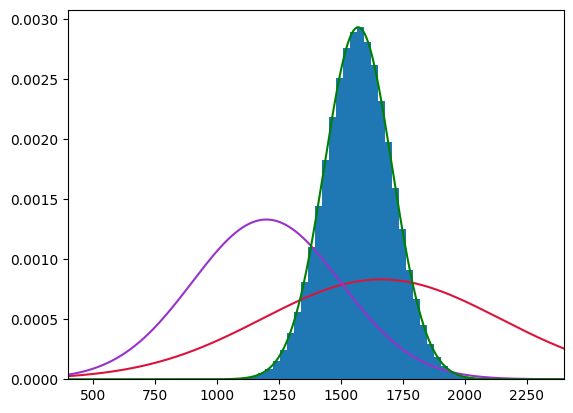

In [34]:
def pdf_func(mean,std,x):
    result = 1./(std * np.sqrt(2 * np.pi)) * np.exp(- (x - mean)**2 / (2 * std**2) )
    return result

x_space = np.linspace(400,2400,2000)
counts, bins, ignored = plt.hist(theta_current, bins=50, density=True)
plt.plot(x_space,pdf_func(mean_Dumbledore,std_Dumbledore, x_space), color='crimson')
plt.plot(x_space,pdf_func(mean_Snape,std_Snape, x_space), color='darkorchid')
plt.plot(x_space,pdf_func(mean_mcmc,std_mcmc, x_space), color='green')
plt.xlim(400,2400)

***